<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Chakraborty Dynamic Model

### Version 1.2

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <ul>
        <li><a href="#FC-Voltage">FC Voltage</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The new dynamic model is presented based on constant fuel utilization control (constant stoichiometry condition). The model solves the long-standing problem of mixing reversible and irreversible potentials (equilibrium and non-equilibrium states) in the Nernst voltage expression. Specifically, a Nernstian gain term is introduced for the constant fuel utilization condition, and it is shown that the Nernstian gain is an irreversibility in the computation of the output voltage of the fuel cell. 
</p>

<div style="text-align:center;">
    
<img src="images/Chakraborty-Diagram.jpg">  
<p style="text-align:center;">Fig1. Chakraborty Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$P_{H_2}=\frac{1}{K_{H_2}}(\frac{1}{u}-1)\frac{i}{2F}$$

$$P_{O_2}=\frac{1}{K_{O_2}}(\frac{1}{ur_{HO}}-\frac{1}{2})\frac{i}{2F}$$

$$P_{H_2O}=\frac{1}{K_{H_2O}}\frac{i}{2F}$$

$$E_{Nernst}=N_0\times [E_0-\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

In [1]:
from opem.Dynamic.Chakraborty import PH2_Calc, PO2_Calc, PH2O_Calc, Enernst_Calc

C:\Users\Sepkjaer\AppData\Local\Programs\Python\Python35-32\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
PH2 = PH2_Calc(KH2=0.000843, u=0.8, I=1)
PO2 = PO2_Calc(KO2=0.00252, u=0.8, rHO=1.145, I=1)
PH2O = PH2O_Calc(KH2O=0.000281, I=1)
Enernst=Enernst_Calc(E0=0.6, N0=2, T=1273, PH2=PH2, PO2=PO2, PH2O=PH2O)
Enernst

2.219608714461736

### FC Voltage

$$Loss_{Ohmic}=r\times i$$

$$Gain_{Nernst}=\frac{RT}{4F}ln(i)$$

$$V_{Fuelcell}=E_{Nernst}+N_0[Gain_{Nernst}-Loss_{Ohmic}]$$

In [3]:
from opem.Dynamic.Chakraborty import Vcell_Calc, Nernst_Gain_Calc, Ohmic_Loss_Calc

In [4]:
Ohmic_Loss = Ohmic_Loss_Calc(Rint=3.28125 * 10**(-3) , I=1)

In [5]:
Nernst_Gain = Nernst_Gain_Calc(T=1273, I=1)

In [6]:
FC_Voltage=Vcell_Calc(Enernst=Enernst, Nernst_Gain=Nernst_Gain, Ohmic_Loss=Ohmic_Loss, N=2)
FC_Voltage

2.213046214461736

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [7]:
from opem.Dynamic.Chakraborty import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=1)
Power

2.213046214461736

In [8]:
Power_Thermal_Calc(VStack=FC_Voltage,N=2,i=1)

0.24695378553826375

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [9]:
from opem.Dynamic.Chakraborty import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=2)

0.7093096841223514

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=300 with `step`=0.1

In [10]:
Test_Vector = {
    "T": 1273,
    "E0": 0.6,
    "u":0.8,
    "N0": 2,
    "R": 3.28125 * 10**(-3),
    "KH2O": 0.000281,
    "KH2": 0.000843,
    "KO2": 0.00252,
    "rho": 1.145,
    "i-start": 0.1,
    "i-stop": 300,
    "i-step": 0.1,
    "Name": "Chakraborty_Test"}


* Notice : "Name", new in version 0.5

In [11]:
from opem.Dynamic.Chakraborty import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Chakraborty-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 2.3459050258175385 V
FC Efficiency : 0.7112027129685051 
FC Power : 0.22189524644617362 W
FC Voltage : 2.218952464461736 V
Nernst Gain : -0.06314815567790122 V
Ohmic Loss : 0.000328125 V
PH2 : 1.536825074161215e-07 atm
PH2O : 1.8441900889934584e-06 atm
PO2 : 1.2167890021049144e-07 atm
Power-Thermal : 0.024104753553826398 W
###########
I : 0.2
E : 2.307886047757724 V
FC Efficiency : 0.7109923764300433 
FC Power : 0.44365924289234715 W
FC Voltage : 2.2182962144617355 V
Nernst Gain : -0.04413866664799421 V
Ohmic Loss : 0.00065625 V
PH2 : 3.07365014832243e-07 atm
PH2O : 3.6883801779869167e-06 atm
PO2 : 2.433578004209829e-07 atm
Power-Thermal : 0.04834075710765289 W
###########
I : 0.3
E : 2.2856463712769926 V
FC Efficiency : 0.7107820398915818 
FC Power : 0.6652919893385206 W
FC Voltage : 2.2176399644617355 V
Nernst Gain : -0.03301882840762842 V
Ohmic Loss : 0.000984375 V
PH2 : 4.6104752224836454e-07 atm
PH2O 

E : 2.081957719159105 V
FC Efficiency : 0.6855416552761975 
FC Power : 26.308346562879354 W
FC Voltage : 2.138889964461736 V
Nernst Gain : 0.06882549765131539 V
Ohmic Loss : 0.040359375 V
PH2 : 1.8902948412182945e-05 atm
PH2O : 0.00022683538094619537 atm
PO2 : 1.496650472589045e-05 atm
Power-Thermal : 3.949653437120646 W
###########
I : 12.4
E : 2.0815135888693 V
FC Efficiency : 0.6853313187377359 
FC Power : 26.514098059325526 W
FC Voltage : 2.138233714461736 V
Nernst Gain : 0.06904756279621792 V
Ohmic Loss : 0.0406875 V
PH2 : 1.9056630919599068e-05 atm
PH2O : 0.00022867957103518883 atm
PO2 : 1.508818362610094e-05 atm
Power-Thermal : 3.9899019406744727 W
###########
I : 12.5
E : 2.081073025929573 V
FC Efficiency : 0.6851209821992744 
FC Power : 26.7197183057717 W
FC Voltage : 2.137577464461736 V
Nernst Gain : 0.06926784426608142 V
Ohmic Loss : 0.041015625 V
PH2 : 1.921031342701519e-05 atm
PH2O : 0.0002305237611241823 atm
PO2 : 1.520986252631143e-05 atm
Power-Thermal : 4.03028169422829

###########
I : 24.4
E : 2.044386496982587 V
FC Efficiency : 0.6600909341223512 
FC Power : 50.25140263286635 W
FC Voltage : 2.0594837144617357 V
Nernst Gain : 0.08761110873957444 V
Ohmic Loss : 0.0800625 V
PH2 : 3.7498531809533645e-05 atm
PH2O : 0.00044998238171440377 atm
PO2 : 2.9689651651359914e-05 atm
Power-Thermal : 9.772597367133647 W
###########
I : 24.5
E : 2.044162162145912 V
FC Efficiency : 0.6598805975838896 
FC Power : 50.44127287931252 W
FC Voltage : 2.0588274644617357 V
Nernst Gain : 0.08772327615791196 V
Ohmic Loss : 0.080390625 V
PH2 : 3.765221431694977e-05 atm
PH2O : 0.0004518265718033973 atm
PO2 : 2.9811330551570405e-05 atm
Power-Thermal : 9.828727120687475 W
###########
I : 24.6
E : 2.043938741099291 V
FC Efficiency : 0.6596702610454281 
FC Power : 50.6310118757587 W
FC Voltage : 2.0581712144617357 V
Nernst Gain : 0.0878349866812224 V
Ohmic Loss : 0.08071875 V
PH2 : 3.780589682436589e-05 atm
PH2O : 0.00045367076189239074 atm
PO2 : 2.99330094517809e-05 atm
Power-Therm

###########
I : 36.9
E : 2.0216990646185593 V
FC Efficiency : 0.6337988668146589 
FC Power : 72.96799593863804 W
FC Voltage : 1.9774524644617357 V
Nernst Gain : 0.09895482492158819 V
Ohmic Loss : 0.121078125 V
PH2 : 5.670884523654883e-05 atm
PH2O : 0.000680506142838586 atm
PO2 : 4.4899514177671345e-05 atm
Power-Thermal : 17.80600406136195 W
###########
I : 37.0
E : 2.0215506212502645 V
FC Efficiency : 0.6335885302761974 
FC Power : 73.14145993508423 W
FC Voltage : 1.976796214461736 V
Nernst Gain : 0.0990290466057357 V
Ohmic Loss : 0.12140625 V
PH2 : 5.6862527743964955e-05 atm
PH2O : 0.0006823503329275795 atm
PO2 : 4.5021193077881836e-05 atm
Power-Thermal : 17.878540064915768 W
###########
I : 37.1
E : 2.021402578539321 V
FC Efficiency : 0.6333781937377359 
FC Power : 73.3147926815304 W
FC Voltage : 1.976139964461736 V
Nernst Gain : 0.09910306796120741 V
Ohmic Loss : 0.121734375 V
PH2 : 5.701621025138108e-05 atm
PH2O : 0.000684194523016573 atm
PO2 : 4.5142871978092334e-05 atm
Power-Ther

Power-Thermal : 27.801381002036415 W
###########
I : 49.4
E : 2.0056972483687616 V
FC Efficiency : 0.6075067995069666 
FC Power : 93.63380799440975 W
FC Voltage : 1.895421214461736 V
Nernst Gain : 0.10695573304648712 V
Ohmic Loss : 0.16209374999999998 V
PH2 : 7.591915866356402e-05 atm
PH2O : 0.0009110299039627683 atm
PO2 : 6.0109376703982776e-05 atm
Power-Thermal : 27.89019200559024 W
###########
I : 49.5
E : 2.0055863286320603 V
FC Efficiency : 0.607296462968505 
FC Power : 93.79086574085593 W
FC Voltage : 1.894764964461736 V
Nernst Gain : 0.10701119291483778 V
Ohmic Loss : 0.162421875 V
PH2 : 7.607284117098015e-05 atm
PH2O : 0.0009128740940517618 atm
PO2 : 6.023105560419326e-05 atm
Power-Thermal : 27.97913425914407 W
###########
I : 49.6
E : 2.005475632749672 V
FC Efficiency : 0.6070861264300434 
FC Power : 93.9477922373021 W
FC Voltage : 1.8941087144617357 V
Nernst Gain : 0.10706654085603196 V
Ohmic Loss : 0.16275 V
PH2 : 7.622652367839627e-05 atm
PH2O : 0.0009147182841407553 atm
PO

Power-Thermal : 39.919943946264716 W
###########
I : 61.9
E : 1.9933247943998111 V
FC Efficiency : 0.5812147321992742 
FC Power : 112.24883880018145 W
FC Voltage : 1.8133899644617357 V
Nernst Gain : 0.11314196003096229 V
Ohmic Loss : 0.20310937499999998 V
PH2 : 9.512947209057921e-05 atm
PH2O : 0.0011415536650869506 atm
PO2 : 7.53192392302942e-05 atm
Power-Thermal : 40.025161199818555 W
###########
I : 62.0
E : 1.9932362555733114 V
FC Efficiency : 0.5810043956608126 
FC Power : 112.38949029662761 W
FC Voltage : 1.8127337144617357 V
Nernst Gain : 0.11318622944421214 V
Ohmic Loss : 0.2034375 V
PH2 : 9.528315459799534e-05 atm
PH2O : 0.001143397855175944 atm
PO2 : 7.54409181305047e-05 atm
Power-Thermal : 40.13050970337238 W
###########
I : 62.1
E : 1.9931478594363603 V
FC Efficiency : 0.5807940591223512 
FC Power : 112.53001054307379 W
FC Voltage : 1.8120774644617357 V
Nernst Gain : 0.1132304275126877 V
Ohmic Loss : 0.203765625 V
PH2 : 9.543683710541146e-05 atm
PH2O : 0.0011452420452649377 

PO2 : 9.040742285639515e-05 atm
Power-Thermal : 54.08928814049303 W
###########
I : 74.4
E : 1.9832359562689403 V
FC Efficiency : 0.5549226648915819 
FC Power : 128.81308835595314 W
FC Voltage : 1.7313587144617357 V
Nernst Gain : 0.11818637909639776 V
Ohmic Loss : 0.244125 V
PH2 : 0.00011433978551759442 atm
PH2O : 0.001372077426211133 atm
PO2 : 9.052910175660565e-05 atm
Power-Thermal : 54.21091164404687 W
###########
I : 74.5
E : 1.9831622829319988 V
FC Efficiency : 0.5547123283531203 
FC Power : 128.93733360239932 W
FC Voltage : 1.7307024644617357 V
Nernst Gain : 0.11822321576486851 V
Ohmic Loss : 0.244453125 V
PH2 : 0.00011449346802501053 atm
PH2O : 0.0013739216163001266 atm
PO2 : 9.065078065681614e-05 atm
Power-Thermal : 54.33266639760069 W
###########
I : 74.6
E : 1.9830887084191473 V
FC Efficiency : 0.5545019918146589 
FC Power : 129.0614475988455 W
FC Voltage : 1.730046214461736 V
Nernst Gain : 0.1182600030212943 V
Ohmic Loss : 0.24478124999999998 V
PH2 : 0.00011464715053242664 a

PO2 : 0.00010561728538270658 atm
Power-Thermal : 70.30941358472133 W
###########
I : 86.9
E : 1.9747176690503165 V
FC Efficiency : 0.5286305975838896 
FC Power : 143.32655666172485 W
FC Voltage : 1.6493274644617357 V
Nernst Gain : 0.12244552270570962 V
Ohmic Loss : 0.285140625 V
PH2 : 0.0001335500989446096 atm
PH2O : 0.0016026011873353154 atm
PO2 : 0.00010573896428291706 atm
Power-Thermal : 70.44744333827516 W
###########
I : 87.0
E : 1.9746545870524415 V
FC Efficiency : 0.528420261045428 
FC Power : 143.434395658171 W
FC Voltage : 1.6486712144617357 V
Nernst Gain : 0.12247706370464716 V
Ohmic Loss : 0.28546875 V
PH2 : 0.00013370378145202572 atm
PH2O : 0.0016044453774243087 atm
PO2 : 0.00010586064318312757 atm
Power-Thermal : 70.585604341829 W
###########
I : 87.1
E : 1.9745915775209786 V
FC Efficiency : 0.5282099245069666 
FC Power : 143.5421034046172 W
FC Voltage : 1.648014964461736 V
Nernst Gain : 0.12250856847037862 V
Ohmic Loss : 0.28579687499999995 V
PH2 : 0.00013385746395944183 

PH2O : 0.0018312807583705038 atm
PO2 : 0.000120827147909018 atm
Power-Thermal : 88.58032027894963 W
###########
I : 99.4
E : 1.9673461817600522 V
FC Efficiency : 0.5023385302761973 
FC Power : 155.78924371749653 W
FC Voltage : 1.5672962144617357 V
Nernst Gain : 0.1261312663508418 V
Ohmic Loss : 0.32615625 V
PH2 : 0.0001527604123716248 atm
PH2O : 0.0018331249484594976 atm
PO2 : 0.0001209488268092285 atm
Power-Thermal : 88.73475628250347 W
###########
I : 99.5
E : 1.967291028622065 V
FC Efficiency : 0.5021281937377358 
FC Power : 155.8806764639427 W
FC Voltage : 1.5666399644617357 V
Nernst Gain : 0.12615884291983528 V
Ohmic Loss : 0.326484375 V
PH2 : 0.0001529140948790409 atm
PH2O : 0.001834969138548491 atm
PO2 : 0.00012107050570943898 atm
Power-Thermal : 88.88932353605729 W
###########
I : 99.6
E : 1.9672359308865366 V
FC Efficiency : 0.5019178571992743 
FC Power : 155.9719779603889 W
FC Voltage : 1.565983714461736 V
Nernst Gain : 0.12618639178759963 V
Ohmic Loss : 0.32681249999999995 V

PH2O : 0.002061804519494686 atm
PO2 : 0.00013603701043532942 atm
Power-Thermal : 108.90200822317793 W
###########
I : 111.9
E : 1.9608490319384155 V
FC Efficiency : 0.476046462968505 
FC Power : 166.20114952326824 W
FC Voltage : 1.4852649644617357 V
Nernst Gain : 0.1293798412616601 V
Ohmic Loss : 0.367171875 V
PH2 : 0.00017197072579864 atm
PH2O : 0.00206364870958368 atm
PO2 : 0.00013615868933553992 atm
Power-Thermal : 109.07285047673177 W
###########
I : 112.0
E : 1.9608000370346608 V
FC Efficiency : 0.4758361264300435 
FC Power : 166.27617601971443 W
FC Voltage : 1.484608714461736 V
Nernst Gain : 0.12940433871353754 V
Ohmic Loss : 0.3675 V
PH2 : 0.0001721244083060561 atm
PH2O : 0.002065492899672673 atm
PO2 : 0.00013628036823575042 atm
Power-Thermal : 109.24382398028557 W
###########
I : 112.1
E : 1.9607510858568409 V
FC Efficiency : 0.47562578989158205 
FC Power : 166.35107126616057 W
FC Voltage : 1.483952464461736 V
Nernst Gain : 0.12942881430244746 V
Ohmic Loss : 0.36782812499999995

PH2 : 0.00019102735671823904 atm
PH2O : 0.0022923282806188686 atm
PO2 : 0.00015124687296164086 atm
Power-Thermal : 131.27447741740622 W
###########
I : 124.4
E : 1.9550406274699654 V
FC Efficiency : 0.4497543956608127 
FC Power : 174.56227407903992 W
FC Voltage : 1.4032337144617357 V
Nernst Gain : 0.13228404349588516 V
Ohmic Loss : 0.4081875 V
PH2 : 0.00019118103922565518 atm
PH2O : 0.002294172470707862 atm
PO2 : 0.00015136855186185136 atm
Power-Thermal : 131.46172592096008 W
###########
I : 124.5
E : 1.954996553710176 V
FC Efficiency : 0.4495440591223511 
FC Power : 174.6208943254861 W
FC Voltage : 1.4025774644617357 V
Nernst Gain : 0.13230608037577982 V
Ohmic Loss : 0.408515625 V
PH2 : 0.0001913347217330713 atm
PH2O : 0.0022960166607968557 atm
PO2 : 0.00015149023076206186 atm
Power-Thermal : 131.6491056745139 W
###########
I : 124.6
E : 1.9549525153367895 V
FC Efficiency : 0.44933372258388965 
FC Power : 174.67938332193228 W
FC Voltage : 1.401921214461736 V
Nernst Gain : 0.1323280995

PH2 : 0.00021023767014525426 atm
PH2O : 0.002522852041743051 atm
PO2 : 0.0001664567354879523 atm
Power-Thermal : 155.69772786163455 W
###########
I : 136.9
E : 1.9497888393945955 V
FC Efficiency : 0.4234623283531205 
FC Power : 180.87261738481166 W
FC Voltage : 1.321202464461736 V
Nernst Gain : 0.1349099375335702 V
Ohmic Loss : 0.449203125 V
PH2 : 0.00021039135265267037 atm
PH2O : 0.0025246962318320443 atm
PO2 : 0.0001665784143881628 atm
Power-Thermal : 155.90138261518834 W
###########
I : 137.0
E : 1.9497487884318034 V
FC Efficiency : 0.42325199181465883 
FC Power : 180.91483138125778 W
FC Voltage : 1.3205462144617357 V
Nernst Gain : 0.13492996301496618 V
Ohmic Loss : 0.44953125 V
PH2 : 0.00021054503516008648 atm
PH2O : 0.002526540421921038 atm
PO2 : 0.00016670009328837327 atm
Power-Thermal : 156.1051686187422 W
###########
I : 137.1
E : 1.9497087666926278 V
FC Efficiency : 0.4230416552761973 
FC Power : 180.95691412770395 W
FC Voltage : 1.3198899644617357 V
Nernst Gain : 0.1349499738

Ohmic Loss : 0.489890625 V
PH2 : 0.00022944798357226945 atm
PH2O : 0.0027533758028672334 atm
PO2 : 0.00018166659801426376 atm
Power-Thermal : 182.17175955586285 W
###########
I : 149.4
E : 1.944996254405805 V
FC Efficiency : 0.3971702610454282 
FC Power : 185.13217944058337 W
FC Voltage : 1.239171214461736 V
Nernst Gain : 0.13730623002796544 V
Ohmic Loss : 0.49021875 V
PH2 : 0.00022960166607968556 atm
PH2O : 0.0027552199929562265 atm
PO2 : 0.00018178827691447424 atm
Power-Thermal : 182.39182055941666 W
###########
I : 149.5
E : 1.9449595533063382 V
FC Efficiency : 0.39695992450696654 
FC Power : 185.15798718702948 W
FC Voltage : 1.2385149644617357 V
Nernst Gain : 0.1373245805776988 V
Ohmic Loss : 0.490546875 V
PH2 : 0.00022975534858710167 atm
PH2O : 0.00275706418304522 atm
PO2 : 0.00018190995581468473 atm
Power-Thermal : 182.6120128129705 W
###########
I : 149.6
E : 1.944922876747896 V
FC Efficiency : 0.39674958796850507 
FC Power : 185.1836636834757 W
FC Voltage : 1.237858714461736 V


Ohmic Loss : 0.53090625 V
PH2 : 0.0002486582969992846 atm
PH2O : 0.0029838995639914156 atm
PO2 : 0.00019687646054057518 atm
Power-Thermal : 210.69657250009115 W
###########
I : 161.9
E : 1.9405889865897543 V
FC Efficiency : 0.37087819373773584 
FC Power : 187.34096024635502 W
FC Voltage : 1.1571399644617357 V
Nernst Gain : 0.13950986393599074 V
Ohmic Loss : 0.531234375 V
PH2 : 0.0002488119795067007 atm
PH2O : 0.002985743754080409 atm
PO2 : 0.00019699813944078567 atm
Power-Thermal : 210.93303975364498 W
###########
I : 162.0
E : 1.9405551182397391 V
FC Efficiency : 0.37066785719927425 
FC Power : 187.35036174280117 W
FC Voltage : 1.1564837144617357 V
Nernst Gain : 0.13952679811099825 V
Ohmic Loss : 0.5315624999999999 V
PH2 : 0.00024896566201411684 atm
PH2O : 0.0029875879441694023 atm
PO2 : 0.00019711981834099614 atm
Power-Thermal : 211.1696382571988 W
###########
I : 162.1
E : 1.940521270789664 V
FC Efficiency : 0.3704575206608128 
FC Power : 187.3596319892474 W
FC Voltage : 1.155827464

Nernst Gain : 0.14153379632169508 V
Ohmic Loss : 0.571921875 V
PH2 : 0.0002678686104262998 atm
PH2O : 0.0032144233251155977 atm
PO2 : 0.00021208632306688659 atm
Power-Thermal : 241.27216669431948 W
###########
I : 174.4
E : 1.936509662229811 V
FC Efficiency : 0.34458612643004344 
FC Power : 187.4989598021267 W
FC Voltage : 1.0751087144617357 V
Nernst Gain : 0.14154952611596244 V
Ohmic Loss : 0.57225 V
PH2 : 0.00026802229293371594 atm
PH2O : 0.0032162675152045913 atm
PO2 : 0.00021220800196709708 atm
Power-Thermal : 241.5250401978733 W
###########
I : 174.5
E : 1.9364782206748619 V
FC Efficiency : 0.34437578989158196 
FC Power : 187.4919550485729 W
FC Voltage : 1.0744524644617357 V
Nernst Gain : 0.1415652468934369 V
Ohmic Loss : 0.5725781249999999 V
PH2 : 0.00026817597544113206 atm
PH2O : 0.003218111705293585 atm
PO2 : 0.00021232968086730758 atm
Power-Thermal : 241.77804495142712 W
###########
I : 174.6
E : 1.9364467971328359 V
FC Efficiency : 0.34416545335312054 
FC Power : 187.48481904

Nernst Gain : 0.14343326030955134 V
Ohmic Loss : 0.6129375 V
PH2 : 0.000287078923853315 atm
PH2O : 0.00344494708623978 atm
PO2 : 0.00022729618559319805 atm
Power-Thermal : 273.8985421385478 W
###########
I : 186.9
E : 1.932712838856058 V
FC Efficiency : 0.3182940591223512 
FC Power : 185.60617810789842 W
FC Voltage : 0.9930774644617357 V
Nernst Gain : 0.14344793780283893 V
Ohmic Loss : 0.613265625 V
PH2 : 0.0002872326063607311 atm
PH2O : 0.0034467912763287735 atm
PO2 : 0.00022741786449340852 atm
Power-Thermal : 274.1678218921016 W
###########
I : 187.0
E : 1.9326834995715356 V
FC Efficiency : 0.3180837225838897 
FC Power : 185.5827671043446 W
FC Voltage : 0.9924212144617359 V
Nernst Gain : 0.14346260744510006 V
Ohmic Loss : 0.6135937499999999 V
PH2 : 0.0002873862888681472 atm
PH2O : 0.003448635466417767 atm
PO2 : 0.00022753954339361902 atm
Power-Thermal : 274.43723289565537 W
###########
I : 187.1
E : 1.932654175972277 V
FC Efficiency : 0.31787338604542814 
FC Power : 185.5592248507907

FC Voltage : 0.9117024644617358 V
Nernst Gain : 0.1452096448808085 V
Ohmic Loss : 0.653953125 V
PH2 : 0.00030628923728033016 atm
PH2O : 0.0036754708473639625 atm
PO2 : 0.00024250604811950946 atm
Power-Thermal : 308.5756988327761 W
###########
I : 199.4
E : 1.929161910382458 V
FC Efficiency : 0.29200199181465886 
FC Power : 181.6626151636701 W
FC Voltage : 0.9110462144617357 V
Nernst Gain : 0.14522340203963888 V
Ohmic Loss : 0.65428125 V
PH2 : 0.0003064429197877463 atm
PH2O : 0.0036773150374529557 atm
PO2 : 0.00024262772701971993 atm
Power-Thermal : 308.8613848363299 W
###########
I : 199.5
E : 1.929134409859893 V
FC Efficiency : 0.2917916552761973 
FC Power : 181.62279791011628 W
FC Voltage : 0.9103899644617357 V
Nernst Gain : 0.14523715230092132 V
Ohmic Loss : 0.6546093749999999 V
PH2 : 0.00030659660229516244 atm
PH2O : 0.0036791592275419492 atm
PO2 : 0.00024274940591993043 atm
Power-Thermal : 309.1472020898837 W
###########
I : 199.6
E : 1.929106923118598 V
FC Efficiency : 0.29158131

FC Voltage : 0.8296712144617358 V
Nernst Gain : 0.14687793435032775 V
Ohmic Loss : 0.69496875 V
PH2 : 0.0003254995507073454 atm
PH2O : 0.0039059946084881447 atm
PO2 : 0.0002577159106458209 atm
Power-Thermal : 345.3036367770044 W
###########
I : 211.9
E : 1.9258269548986187 V
FC Efficiency : 0.26570992450696657 
FC Power : 175.6682709694418 W
FC Voltage : 0.8290149644617357 V
Nernst Gain : 0.14689087978155857 V
Ohmic Loss : 0.695296875 V
PH2 : 0.0003256532332147615 atm
PH2O : 0.003907838798577138 atm
PO2 : 0.00025783758954603137 atm
Power-Thermal : 345.6057290305582 W
###########
I : 212.0
E : 1.9258010762517095 V
FC Efficiency : 0.2654995879685051 
FC Power : 175.61204746588803 W
FC Voltage : 0.8283587144617359 V
Nernst Gain : 0.14690381910501316 V
Ohmic Loss : 0.6956249999999999 V
PH2 : 0.0003258069157221776 atm
PH2O : 0.003909682988666132 atm
PO2 : 0.0002579592684462419 atm
Power-Thermal : 345.907952534112 W
###########
I : 212.1
E : 1.9257752098088314 V
FC Efficiency : 0.26528925143

FC Power : 167.69564402876733 W
FC Voltage : 0.7476399644617358 V
Nernst Gain : 0.1484505329403847 V
Ohmic Loss : 0.735984375 V
PH2 : 0.00034470986413436054 atm
PH2O : 0.004136518369612327 atm
PO2 : 0.0002729257731721323 atm
Power-Thermal : 384.0823559712327 W
###########
I : 224.4
E : 1.9226832002671643 V
FC Efficiency : 0.23941785719927422 
FC Power : 167.62314552521346 W
FC Voltage : 0.7469837144617355 V
Nernst Gain : 0.14846275709728565 V
Ohmic Loss : 0.7363125 V
PH2 : 0.0003448635466417767 atm
PH2O : 0.0041383625597013205 atm
PO2 : 0.0002730474520723428 atm
Power-Thermal : 384.40085447478657 W
###########
I : 224.5
E : 1.9226587628459062 V
FC Efficiency : 0.23920752066081272 
FC Power : 167.55051577165966 W
FC Voltage : 0.7463274644617357 V
Nernst Gain : 0.14847497580791474 V
Ohmic Loss : 0.7366406249999999 V
PH2 : 0.00034501722914919276 atm
PH2O : 0.004140206749790314 atm
PO2 : 0.0002731691309725533 atm
Power-Thermal : 384.7194842283403 W
###########
I : 224.6
E : 1.9226343363074

FC Power : 157.61614358453903 W
FC Voltage : 0.6656087144617358 V
Nernst Gain : 0.14993782510727657 V
Ohmic Loss : 0.777 V
PH2 : 0.00036392017756137576 atm
PH2O : 0.004367042130736509 atm
PO2 : 0.0002881356356984438 atm
Power-Thermal : 424.911856415461 W
###########
I : 236.9
E : 1.9197099062180836 V
FC Efficiency : 0.21312578989158196 
FC Power : 157.5272388309852 W
FC Voltage : 0.6649524644617357 V
Nernst Gain : 0.14994940412182614 V
Ohmic Loss : 0.777328125 V
PH2 : 0.00036407386006879187 atm
PH2O : 0.004368886320825502 atm
PO2 : 0.00028825731459865424 atm
Power-Thermal : 425.2467611690148 W
###########
I : 237.0
E : 1.9196867579623669 V
FC Efficiency : 0.21291545335312048 
FC Power : 157.4382028274314 W
FC Voltage : 0.6642962144617359 V
Nernst Gain : 0.1499609782496845 V
Ohmic Loss : 0.7776562499999999 V
PH2 : 0.000364227542576208 atm
PH2O : 0.004370730510914496 atm
PO2 : 0.0002883789934988647 atm
Power-Thermal : 425.5817971725686 W
###########
I : 237.1
E : 1.9196636194717867 V
FC 

FC Efficiency : 0.18704405912235122 
FC Power : 145.48586189031073 W
FC Voltage : 0.5835774644617358 V
Nernst Gain : 0.15134859155965044 V
Ohmic Loss : 0.818015625 V
PH2 : 0.0003831304909883909 atm
PH2O : 0.004597565891860692 atm
PO2 : 0.0003033454982247552 atm
Power-Thermal : 467.7921381096893 W
###########
I : 249.4
E : 1.9168895342332144 V
FC Efficiency : 0.18683372258388967 
FC Power : 145.3805508867569 W
FC Voltage : 0.5829212144617357 V
Nernst Gain : 0.15135959011426076 V
Ohmic Loss : 0.81834375 V
PH2 : 0.0003832841734958071 atm
PH2O : 0.004599410081949685 atm
PO2 : 0.00030346717712496565 atm
Power-Thermal : 468.1434491132431 W
###########
I : 249.5
E : 1.9168675459422377 V
FC Efficiency : 0.1866233860454282 
FC Power : 145.2751086332031 W
FC Voltage : 0.5822649644617359 V
Nernst Gain : 0.15137058425974906 V
Ohmic Loss : 0.8186718749999999 V
PH2 : 0.00038343785600322315 atm
PH2O : 0.004601254272038678 atm
PO2 : 0.0003035888560251761 atm
Power-Thermal : 468.4948913667969 W
#######

PH2O : 0.004844687363785815 atm
PO2 : 0.00031965047085296105 atm
Power-Thermal : 516.0373813359018 W
###########
I : 262.8
E : 1.9140189565186616 V
FC Efficiency : 0.15864862643004357 
FC Power : 130.08172016054422 W
FC Voltage : 0.49498371446173595 V
Nernst Gain : 0.15279487897153715 V
Ohmic Loss : 0.8623125 V
PH2 : 0.0004038776294895673 atm
PH2O : 0.004846531553874809 atm
PO2 : 0.0003197721497531716 atm
Power-Thermal : 516.4062798394558 W
###########
I : 262.9
E : 1.9139980891830068 V
FC Efficiency : 0.158438289891582 
FC Power : 129.95869040699037 W
FC Voltage : 0.4943274644617359 V
Nernst Gain : 0.15280531263936445 V
Ohmic Loss : 0.8626406249999999 V
PH2 : 0.00040403131199698343 atm
PH2O : 0.004848375743963801 atm
PO2 : 0.000319893828653382 atm
Power-Thermal : 516.7753095930095 W
###########
I : 263.0
E : 1.9139772297832094 V
FC Efficiency : 0.15822795335312048 
FC Power : 129.83552940343654 W
FC Voltage : 0.4936712144617359 V
Nernst Gain : 0.1528157423392632 V
Ohmic Loss : 0.86296

E : 1.9116697887087613 V
FC Efficiency : 0.1344599245069666 
FC Power : 115.07295475185413 W
FC Voltage : 0.41951496446173575 V
Nernst Gain : 0.15396946287648727 V
Ohmic Loss : 0.900046875 V
PH2 : 0.0004215511178424213 atm
PH2O : 0.005058613414109056 atm
PO2 : 0.00033376522327737806 atm
Power-Thermal : 559.7050452481459 W
###########
I : 274.4
E : 1.9116497960746393 V
FC Efficiency : 0.1342495879685051 
FC Power : 114.93483124830034 W
FC Voltage : 0.41885871446173595 V
Nernst Gain : 0.15397945919354827 V
Ohmic Loss : 0.9003749999999999 V
PH2 : 0.00042170480034983736 atm
PH2O : 0.005060457604198049 atm
PO2 : 0.0003338869021775885 atm
Power-Thermal : 560.0891687516995 W
###########
I : 274.5
E : 1.9116298107251353 V
FC Efficiency : 0.13403925143004355 
FC Power : 114.79657649474652 W
FC Voltage : 0.4182024644617359 V
Nernst Gain : 0.1539894518683002 V
Ohmic Loss : 0.9007031249999999 V
PH2 : 0.00042185848285725353 atm
PH2O : 0.005062301794287043 atm
PO2 : 0.000334008581077799 atm
Power-Th

E : 1.9092255333312316 V
FC Efficiency : 0.10816785719927427 
FC Power : 96.79032930762581 W
FC Voltage : 0.33748371446173575 V
Nernst Gain : 0.1551915905652521 V
Ohmic Loss : 0.9410625 V
PH2 : 0.0004407614312694365 atm
PH2O : 0.005289137175233239 atm
PO2 : 0.0003489750858036895 atm
Power-Thermal : 608.7376706923742 W
###########
I : 286.9
E : 1.909206411911792 V
FC Efficiency : 0.10795752066081273 
FC Power : 96.63579955407197 W
FC Voltage : 0.3368274644617357 V
Nernst Gain : 0.15520115127497183 V
Ohmic Loss : 0.9413906249999999 V
PH2 : 0.0004409151137768526 atm
PH2O : 0.005290981365322231 atm
PO2 : 0.00034909676470389994 atm
Power-Thermal : 609.138200445928 W
###########
I : 287.0
E : 1.9091872971560293 V
FC Efficiency : 0.10774718412235132 
FC Power : 96.48113855051827 W
FC Voltage : 0.33617121446173615 V
Nernst Gain : 0.1552107086528533 V
Ohmic Loss : 0.9417187499999999 V
PH2 : 0.0004410687962842687 atm
PH2O : 0.005292825555411225 atm
PO2 : 0.00034921844360411047 atm
Power-Thermal 

I : 299.3
E : 1.906885569601493 V
FC Efficiency : 0.0818757898915819 
FC Power : 76.45692261339745 W
FC Voltage : 0.25545246446173553 V
Nernst Gain : 0.15636157243012128 V
Ohmic Loss : 0.982078125 V
PH2 : 0.0004599717446964517 atm
PH2O : 0.005519660936357421 atm
PO2 : 0.00036418494833000093 atm
Power-Thermal : 659.8210773866025 W
###########
I : 299.4
E : 1.9068672466378664 V
FC Efficiency : 0.08166545335312049 
FC Power : 76.28598660984373 W
FC Voltage : 0.25479621446173595 V
Nernst Gain : 0.15637073391193468 V
Ohmic Loss : 0.9824062499999999 V
PH2 : 0.00046012542720386774 atm
PH2O : 0.0055215051264464144 atm
PO2 : 0.0003643066272302114 atm
Power-Thermal : 660.2380133901561 W
###########
I : 299.5
E : 1.9068489297931124 V
FC Efficiency : 0.08145511681465895 
FC Power : 76.1149193562899 W
FC Voltage : 0.2541399644617359 V
Nernst Gain : 0.15637989233431174 V
Ohmic Loss : 0.9827343749999999 V
PH2 : 0.0004602791097112839 atm
PH2O : 0.005523349316535407 atm
PO2 : 0.00036442830613042193 atm

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [12]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Chakraborty-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [13]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Chakraborty Simulation Failed!(Check Your Inputs)',
 'Status': False}

* Notice:

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)

## Plot

In [14]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


In [15]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


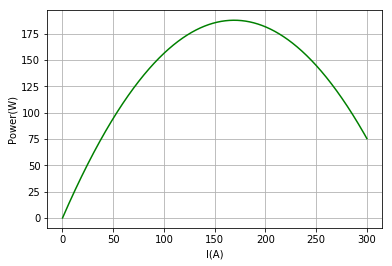

In [16]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

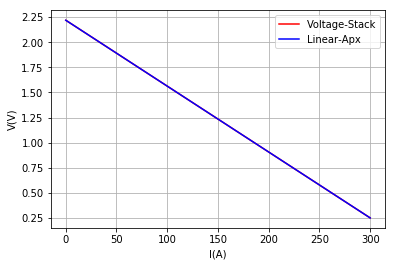

In [17]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

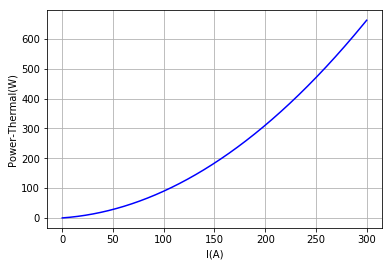

In [18]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

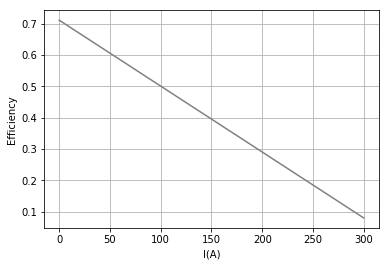

In [19]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

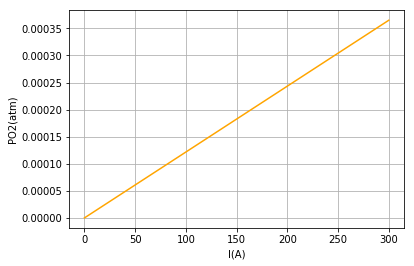

In [20]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

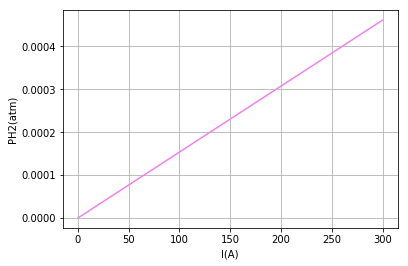

In [21]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

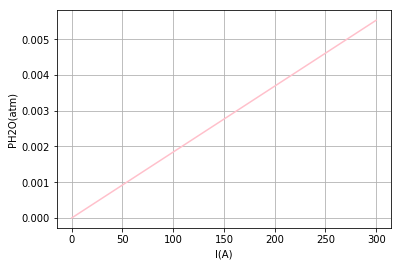

In [22]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

<a href="Padulles-II/Padulles2_Test.html">HTML File</a>

<a href="Padulles-II/Padulles2_Test.opem">OPEM File</a>

<a href="Padulles-II/Padulles2_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Cell operation temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">Fuel cell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

## Reference
<blockquote>
U. Chakraborty, A New Model for Constant Fuel Utilization and Constant Fuel Flow in Fuel Cells, Appl. Sci. 9 (2019) 1066. https://doi.org/10.3390/app9061066.
</blockquote>